In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report


# READING THE DATA

In [2]:
df_train=pd.read_csv("titanic.csv")
df_train.shape

(891, 12)

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()
#embarked means the place from where the passanger get on the ship
#consider thre places S, C and Q

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# CLEANING THE DATA

In [7]:
df_train.isnull().sum()
#calculating null values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#variable 'cabin' have a lot of null values and it is not significant for determining the survivbility of the people
#so we can drop that coloums like passengerid , name , ticket , cabin to refine our data
df_train=df_train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#now we need to fill up the null values in age with the average value of age of people
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
#now we will assign the age to the null values according to the class of people
def age_approx(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 25
    else:
        return age

In [11]:
df_train["Age"]=df_train[["Age","Pclass"]].apply(age_approx,axis=1)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
#since only 2 nulls are left in embark we can drop those 2 data entities
df_train.dropna(inplace=True)

In [13]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
#now we need to convert 'sex' and 'embarked' into catagorical values
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [16]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [17]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

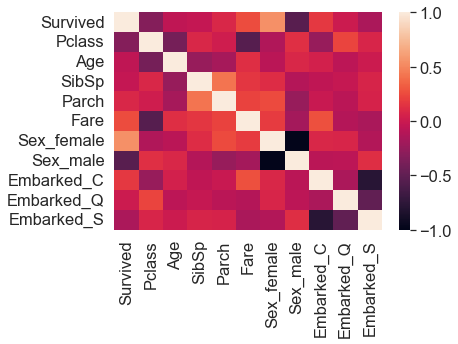

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

## TRAINING THE MODEL

In [19]:
used_features=["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]
X=df_train_dummied[used_features].values
Y=df_train_dummied["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=37)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(622, 9)
(267, 9)
(622,)
(267,)


In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_predicted=model.predict(x_test)
y_predicted.shape

(267,)

In [23]:
c_matrix=confusion_matrix(y_test,y_predicted)
print(c_matrix)

[[138  21]
 [ 33  75]]


In [24]:
accuracy_score(y_test,y_predicted)

0.797752808988764

In [30]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       159
           1       0.78      0.69      0.74       108

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



## PREDICTING THE COEFFICIENT AND INTERCEPT OF THE LOGISTIC CURVE

In [31]:
model.coef_

array([[-1.18453556, -0.03634795, -0.31853973, -0.1070885 ,  1.31896126,
        -1.31988501,  0.27307618, -0.01797842, -0.25602151]])

In [32]:
model.intercept_

array([3.82894415])

## CHECKING THE ALGORITHM'S PREDICTED PROBABILITIES

In [33]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [34]:
model.predict_proba(x_test)
#first column - the probability that a person has not survived
#second column - the probability of a person surviving

array([[0.8777426 , 0.1222574 ],
       [0.89250776, 0.10749224],
       [0.88143887, 0.11856113],
       [0.25561334, 0.74438666],
       [0.90107868, 0.09892132],
       [0.84503835, 0.15496165],
       [0.87597259, 0.12402741],
       [0.10218266, 0.89781734],
       [0.92606839, 0.07393161],
       [0.91888966, 0.08111034],
       [0.43739296, 0.56260704],
       [0.40963502, 0.59036498],
       [0.44611567, 0.55388433],
       [0.77605449, 0.22394551],
       [0.05525751, 0.94474249],
       [0.72876868, 0.27123132],
       [0.90107868, 0.09892132],
       [0.02798261, 0.97201739],
       [0.07332617, 0.92667383],
       [0.57754907, 0.42245093],
       [0.10749092, 0.89250908],
       [0.48133599, 0.51866401],
       [0.93945907, 0.06054093],
       [0.79443418, 0.20556582],
       [0.04658851, 0.95341149],
       [0.70800107, 0.29199893],
       [0.1231809 , 0.8768191 ],
       [0.94774495, 0.05225505],
       [0.47226881, 0.52773119],
       [0.93808855, 0.06191145],
       [0.